In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv("testdata1.csv")

X=dataset.iloc[:, :4].values
              
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X[:, 2:3])
X[:, 2:3]=imputer.transform(X[:, 2:3])              

from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X[:, 2:3])
X[:, 3:4]=imputer.transform(X[:, 3:4])  

X_view=pd.DataFrame(X)

C:\Users\Aripra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Aripra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mprevd=np.mean(X[:,2:3],axis=0)
mprev_view=pd.DataFrame(mprevd)
print ("Previous depth =",mprevd)

mcurrd=np.mean(X[:,3:4],axis=0)
mcurrd_view=pd.DataFrame(mcurrd)
print ("Current depth =",mcurrd)



Previous depth = [1002.4098360655738]
Current depth = [234.80771935018345]


In [3]:
reg=np.array(X[:,1:2],dtype=np.str)
arrprev=np.array(X[:,2:3],dtype=np.float)
arrcurr=np.array(X[:,3:4],dtype=np.float)
sprev=np.tile(0.0,7)
scurr=np.tile(0.0,7)
count=np.tile(0.0,7)
meanprev=np.tile(0.0,7)
meancurr=np.tile(0.0,7)

for i in range(0,443):
    if reg[i]=="WON":
        sprev[0]=sprev[0]+arrprev[i]
        scurr[0]=scurr[0]+arrcurr[i]
        count[0]=count[0]+1
    if reg[i]=="KG-PG":
        sprev[1]=sprev[1]+arrprev[i]
        scurr[1]=scurr[1]+arrcurr[i]
        count[1]=count[1]+1
    if reg[i]=="FRONTIER BASIN":
        sprev[2]=sprev[2]+arrprev[i]
        scurr[2]=scurr[2]+arrcurr[i]
        count[2]=count[2]+1
             
    if reg[i]=="WOFF":
        sprev[3]=sprev[3]+arrprev[i]
        scurr[3]=scurr[3]+arrcurr[i]
        count[3]=count[3]+1
             
    if reg[i]=="CAUVERY":
        sprev[4]=sprev[4]+arrprev[i]
        scurr[4]=scurr[4]+arrcurr[i]
        count[4]=count[4]+1
             
    if reg[i]=="ASSAM":
        sprev[5]=sprev[5]+arrprev[i]
        scurr[5]=scurr[5]+arrcurr[i]
        count[5]=count[5]+1
             
    if reg[i]=="MBA":
        sprev[6]=sprev[6]+arrprev[i]
        scurr[6]=scurr[6]+arrcurr[i]
        count[6]=count[6]+1
 
for i in range(0,7):
    meanprev[i]=sprev[i]/count[i]
    meancurr[i]=scurr[i]/count[i]
    
region=[]
region.append("WON")
region.append("KG-PG")
region.append("FRONTIER BASIN")
region.append("WOFF")
region.append("CAUVERY")
region.append("ASSAM")
region.append("MBA")


In [4]:

for i in range(0,7):
    print (region[i])
    print ("PREVIOUS DEPTH = " , meanprev[i])
    print ("CURRENT DEPTH = " , meancurr[i])
    

WON
PREVIOUS DEPTH =  817.9833600394442
CURRENT DEPTH =  290.02304942684583
KG-PG
PREVIOUS DEPTH =  984.6296268822787
CURRENT DEPTH =  57.542392997552106
FRONTIER BASIN
PREVIOUS DEPTH =  1845.704918032787
CURRENT DEPTH =  1864.704918032787
WOFF
PREVIOUS DEPTH =  699.3556995806327
CURRENT DEPTH =  372.98970644300414
CAUVERY
PREVIOUS DEPTH =  2050.2049180327867
CURRENT DEPTH =  2050.2049180327867
ASSAM
PREVIOUS DEPTH =  2012.074681238616
CURRENT DEPTH =  659.9635701275046
MBA
PREVIOUS DEPTH =  818.3524590163935
CURRENT DEPTH =  250.60245901639345


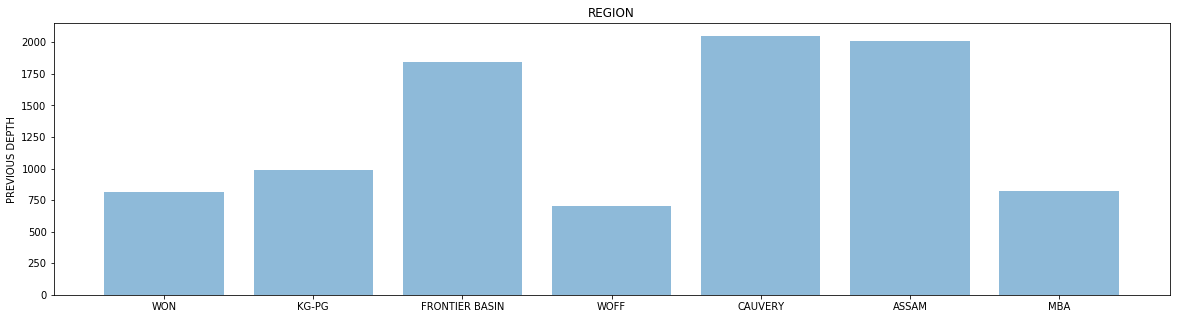

In [5]:
objects = ('WON', 'KG-PG', 'FRONTIER BASIN', 'WOFF', 'CAUVERY', 'ASSAM','MBA')
y_pos = np.arange(len(objects))
plt.figure(figsize=(20, 5))

plt.bar(y_pos, meanprev, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('PREVIOUS DEPTH')
plt.title('REGION')
plt.show()

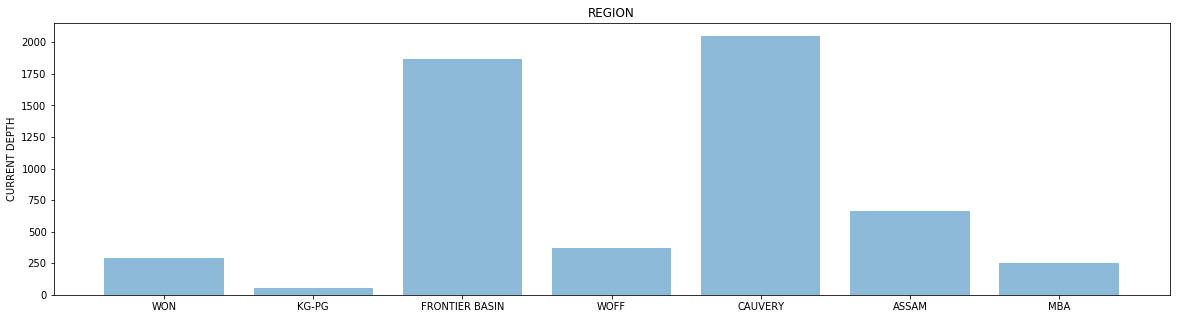

In [6]:
plt.figure(figsize=(20, 5))
y_pos1 = np.arange(len(objects))   
plt.bar(y_pos1, meancurr, align='center', alpha=0.5)
plt.xticks(y_pos1, objects)
plt.ylabel('CURRENT DEPTH')
plt.title('REGION')      
plt.show() 

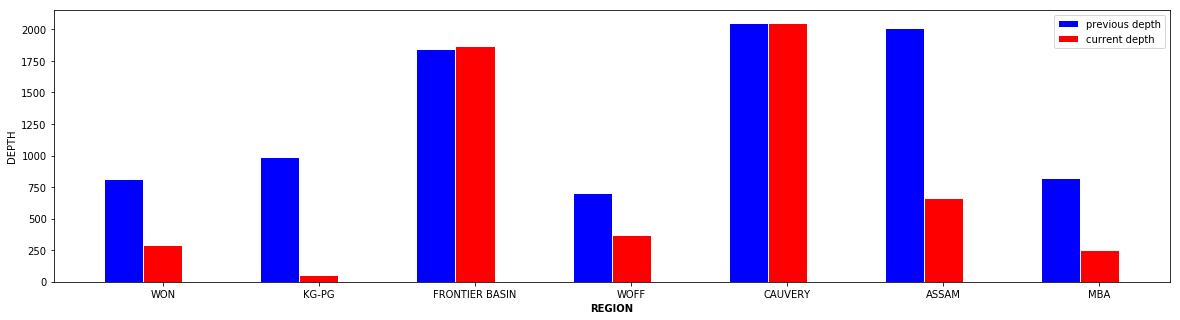

In [8]:
plt.figure(figsize=(20, 5))
barWidth = 0.25
r1 = np.arange(len(objects))
r2 = [x + barWidth for x in r1]

plt.ylabel('DEPTH')
plt.bar(r1, meanprev, color='b', width=barWidth, edgecolor='white', label='previous depth')
plt.bar(r2, meancurr, color='r', width=barWidth, edgecolor='white', label='current depth')
 
plt.xlabel('REGION', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(objects))], ['WON', 'KG-PG', 'FRONTIER BASIN', 'WOFF', 'CAUVERY', 'ASSAM','MBA'])
 
plt.legend()
plt.show()
